# Simulate living organism competing and in symbiosis

We have some cells interacting with each other. There are these rules:

1) Every Cell has an energy level. Every time step the energy level decreases (The cell is searching food so it spends energy);
    
2) Whenever a cell attack another cell there is a chance of killing the other cell depending on the energy level of the attacker and the defender. If a cell manage to kill the other it earn half the energy of the other cell;

3) Whenever a cell replicate itself it creates 2 cell with each half the energy level of the original cell;

4) Whenever a cell will find a particle of food its energy level will rise.

5) Every time step there is a small % two cell start collaborating and the % of finding food will rise.

6) Whenever the energy of a cell is 0, the cell dies.

7) Every time step there is a small percentage of a cell getting ill (and die, yeah, a small cold will kill them ahah)

## Code

Importing modules

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import random

In [2]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

Let's simulate a number of cells.

In [3]:
num_cell = 10

We will create a class to store the attributes of the cell.
Every cell has an energy level. The default value is 10. When the energy level reaches 0 the cell dies. 

In [4]:
class Cell():
    def __init__(self, energy):
        self.e = energy        

Let's now append the cells into a list.

In [5]:
cell_array = []

for i in range(num_cell): #Append the cells in an array
    energy_level = 10
    cell = Cell(energy_level)
    cell_array.append(cell)

We need a function to generate weighted random numbers.

In [6]:
def random_chance(p):
    """
    Return True or False with weighted chances
    p: chance of returning True
    return: True or False
    """
    p2 = 100 - p
    result = random.choices([True, False], weights=(p, p2), k=1)
    return result[0]

Now we will define a function that update every time step the energy level of the cells. (The cells are walking around doing their stuff, so they consume energy).

In [7]:
def normal_loss(): #Normal loss of energy (1 e/step) and probabilty of illness
    for cell in cell_array:
        if random_chance(10) == True: #10% chance of illness
            cell.e -= 3  #The cell loses more energy due to the illness
        else:
            cell.e -= 1 #Normal loss

Another useful function is the one responsible for the food search.

In [8]:
def food_search(): #Every time step there is a 30% chance of finding food (energy)
    for cell in cell_array:
        if random_chance(10) == True: #return true 10% of the times
            cell.e += 3

Some cells decided that they are not into food search, so turned to attacking other cells and eat them (sorry little cells.). Let's integrate this into a function.

In [9]:
def attack(): #Casually pick 2 cells and let the fight begin
    
    if random_chance(30):#30% chance of a cell attacking another one
        if (len(cell_array) > 2):
            index = [i for i in range(len(cell_array))] #List containing all the index of the cells
            fighters = random.sample(index, 2) #Index of fitghers
            energy = cell_array[fighters[1]].e #Energy of defender (def always lose)
            cell_array[fighters[1]].e = 0
            cell_array[fighters[0]].e += (energy / 2) #Attacker earn half the energy of the defender
            
        elif (len(cell_array) == 2): #Otherwise let's handle this differently because under 2 cells random.sample will fail
            energy = cell_array[1].e #defender
            cell_array[1].e = 0
            cell_array[0].e += (energy / 2)
            
    
    

Cells also have the ability to reproduce, so let's give them this opportunity.

In [10]:
def reproduce():
    for cell in cell_array: #Every time step there is a 5% chance of reproduction
        if random_chance(5) == True:
            energy = cell.e
            cell.e = 0 #Let's kill the parent
            child_energy = energy / 2 #The energy of the child is half of the parent
            child = Cell(child_energy)
            cell_array.append(child)
            cell_array.append(child) #From one cell, two new born cells
        
    

Let's define a function that "Kills" every cell that has ran out of energy.

In [11]:
def kill(): #Remove the cells with 0 energy
    global cell_array #Refer to the global varible containing the list of cells
    cell_array = [cell for cell in cell_array if cell.e > 0] #Update the array removing died cells

Now we will integrate all the functions in a *step* function.

In [12]:
def step():
    kill()
    normal_loss()
    food_search()
    reproduce()
    attack()
    

We will now create some lists to store information about our system:

In [13]:
system_energy = [] #List containing a list of the energy level of every cell 
# for every timestep(bidimensional list)

Now it's time for the simulation!

In [14]:
num_step = 30 #Duration of simulation
def simulate():
    for i in range(num_step):
        step()
        en_level = [] #Energy level of every cell for this time step
        for i in range(len(cell_array)):
            en = cell_array[i].e
            en_level.append(en)
        system_energy.append(en_level)

Let's run the simulation:

In [15]:
simulate()

Now we will create a useful Numpy array and try to get some information from it.

In [16]:
system = np.array(system_energy)

live_cells = [len(elem) for elem in system] #Population (number of live cells)
time_steps = [i for i in range(len(live_cells))] #Time steps

It's now interesting to plot the number of cells.

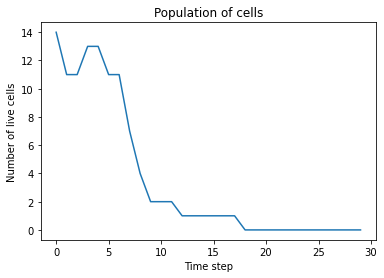

In [17]:
plt.plot(time_steps, live_cells) #Cells population over time
plt.title("Population of cells")
plt.xlabel("Time step")
plt.ylabel("Number of live cells")
plt.show()

We will store the data in a Pandas datatype called DataFrame in case we need to show all the records. (Here we have the energy level of a cell for every Time step. When the cell dies a "NaN" shows up in the table).

In [18]:
data = pd.DataFrame(system_energy)
#Uncomment the following line to display the table with the energy level of every cell for every timestep
#data 